In [32]:
import matplotlib.pyplot as plt
import json
import numpy
import pandas as pd
import datetime

In [9]:
def plotGraph(y, time, action):
    userInput = ("Enter if you want to plot KeyUp or KeyDowns")
    data = y
    x = list(range(len(data)))

    # Average
    average = numpy.mean(data)
    # Words Per Minute = (Chr / 5) / Time
    wpm = 1000 * len(data) / time

    # MatPlotLib Handling
    plt.title("Time Elapsed Between "+action+" Events")
    plt.ylabel("Key Number")
    plt.ylabel("Milliseconds")
    plt.plot(x, y)
    # Format average display box
    plt.text(5, 35, ("WPM: ", wpm, "Average", average) ,style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
    plt.show()

In [150]:
def gettimeBetweenUPS(ksdf):
    action = 'Up'
    ups = list(ksdf[ksdf.action == action].time)
    time = ups[len(ups) - 1] - ups[0]
    time_between_ups = []
    while len(ups) > 1:
         #Get the time from the tuple
        startTime = ups.pop(0)
        betweenTime = ups[0] - startTime
        time_between_ups.append(betweenTime)
        #average = numpy.mean(time_between_downs)
    return (time_between_ups)

def timeBetweenUPS(ksdf):
    action = 'Up'
    ups = list(ksdf[ksdf.action == action].time)
    time = ups[len(ups) - 1] - ups[0]
    plotGraph(gettimeBetweenUPS(ksdf), time, action)

In [151]:
def gettimeBetweenDOWNS(ksdf):
    action = 'Down'
    downs = list(ksdf[ksdf.action == action].time)
    time_between_downs = []
    time = downs[len(downs) - 1] - downs[0]
    while len(downs) > 1:
        startTime = downs.pop(0) #Get the time from the tuple
        betweenTime = downs[0] - startTime
        time_between_downs.append(betweenTime)
        #average = numpy.mean(time_between_downs)
    return time_between_downs
    
def timeBetweenDOWNS(ksdf):
    action = 'Down'
    downs = list(ksdf[ksdf.action == action].time)
    time = downs[len(downs) - 1] - downs[0]
    plotGraph(gettimeBetweenDOWNS(ksdf), time, action)

In [152]:
def gettimeHoldingKey(ksdf):
    action = 'Hold'
    time_holding_key = []
    ups = list(ksdf[ksdf.action == 'Up'].time)
    downs = list(ksdf[ksdf.action == 'Down'].time)
    time = downs[len(downs) - 1] - downs[0]
    while len(downs) > 1:
        downTime = downs.pop(0)
        holdTime = ups.pop(0) - downTime
        time_holding_key.append(holdTime)
        #average = numpy.mean(time_between_downs)
    return time_holding_key
    
def timeHoldingKey(ksdf):
    action = 'Hold'
    downs = list(ksdf[ksdf.action == 'Down'].time)
    time = downs[len(downs) - 1] - downs[0]
    plotGraph(gettimeHoldingKey(ksdf), time, action)

In [153]:
def gettimeBetweenKey(ksdf):
    action = 'Between'
    time_between_key = []
    ups = list(ksdf[ksdf.action == 'Up'].time)
    downs = list(ksdf[ksdf.action == 'Down'].time)
    del downs[0]
    time = downs[len(downs) - 1] - downs[0]
    while len(ups) > 1:
        upTime = ups.pop(0)
        betweenTime = downs.pop(0) - upTime
        time_between_key.append(betweenTime)
        #average = numpy.mean(time_between_downs)
    return time_between_key
    
def timeBetweenKey(ksdf):
    action = 'Between'
    downs = list(ksdf[ksdf.action == 'Down'].time)
    time = downs[len(downs) - 1] - downs[0]
    plotGraph(gettimeBetweenKey(ksdf), time, action)

In [112]:
userdf = pd.read_csv('userdata.csv')
userdf#[userdf.username == 'd3'

,username,sn,phrase,date,key,action,time
0,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,D,Down,694791687
1,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,S,Down,694791765
2,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,D,Up,694791812
3,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,S,Up,694791859
4,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,L,Down,694791953
5,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,L,Up,694792046
6,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,H,Down,694792156
7,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,H,Up,694792250
8,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,B,Down,694792296
9,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,B,Up,694792406


In [51]:
# userdf = userdf.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [61]:
# userdf.drop(userdf[userdf.sn == 105].index, inplace=True)
# userdf.to_csv('userdata.csv', index=False)

    username    sn   phrase                        date key action       time
140   george  10.0  dslhbyj  2018-06-03 12:59:03.924648   D   Down  694805968
141   george  10.0  dslhbyj  2018-06-03 12:59:03.924648   S   Down  694806046
142   george  10.0  dslhbyj  2018-06-03 12:59:03.924648   D     Up  694806093
143   george  10.0  dslhbyj  2018-06-03 12:59:03.924648   S     Up  694806140
144   george  10.0  dslhbyj  2018-06-03 12:59:03.924648   L   Down  694806265
145   george  10.0  dslhbyj  2018-06-03 12:59:03.924648   L     Up  694806359
146   george  10.0  dslhbyj  2018-06-03 12:59:03.924648   H   Down  694806453
147   george  10.0  dslhbyj  2018-06-03 12:59:03.924648   H     Up  694806546
148   george  10.0  dslhbyj  2018-06-03 12:59:03.924648   B   Down  694806593
149   george  10.0  dslhbyj  2018-06-03 12:59:03.924648   B     Up  694806687
150   george  10.0  dslhbyj  2018-06-03 12:59:03.924648   Y   Down  694806718
151   george  10.0  dslhbyj  2018-06-03 12:59:03.924648   Y     

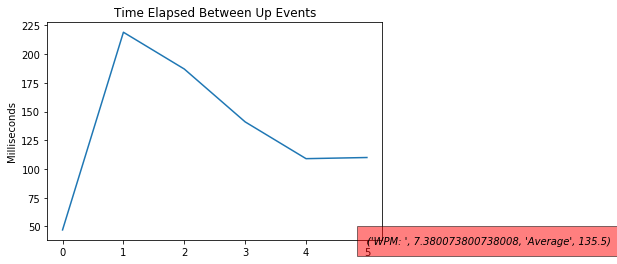

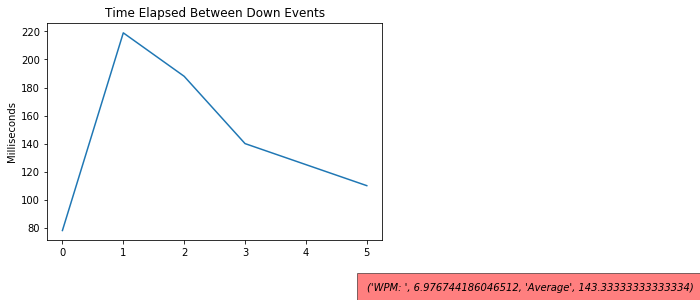

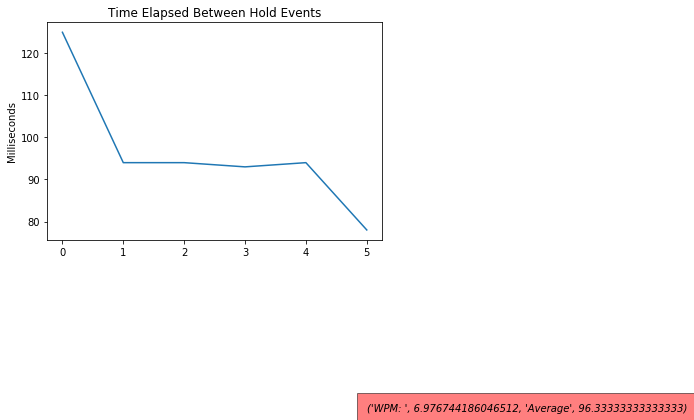

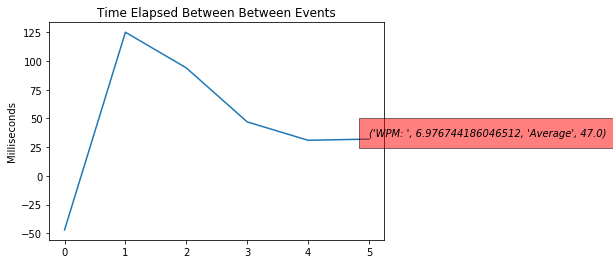

In [154]:
sn = 10
username = 'george'
print(userdf[(userdf.sn == sn) & (userdf.username == username)])
timeBetweenUPS(userdf[(userdf.sn == sn) & (userdf.username == username)])
timeBetweenDOWNS(userdf[(userdf.sn == sn) & (userdf.username == username)])
timeHoldingKey(userdf[(userdf.sn == sn) & (userdf.username == username)])
timeBetweenKey(userdf[(userdf.sn == sn) & (userdf.username == username)])

    username    sn   phrase                        date key action       time
380   tamara  10.0  dslhbyj  2018-06-03 13:33:35.568838   D   Down  696876593
381   tamara  10.0  dslhbyj  2018-06-03 13:33:35.568838   D     Up  696876671
382   tamara  10.0  dslhbyj  2018-06-03 13:33:35.568838   S   Down  696876765
383   tamara  10.0  dslhbyj  2018-06-03 13:33:35.568838   S     Up  696876859
384   tamara  10.0  dslhbyj  2018-06-03 13:33:35.568838   L   Down  696877046
385   tamara  10.0  dslhbyj  2018-06-03 13:33:35.568838   L     Up  696877125
386   tamara  10.0  dslhbyj  2018-06-03 13:33:35.568838   H   Down  696877593
387   tamara  10.0  dslhbyj  2018-06-03 13:33:35.568838   H     Up  696877671
388   tamara  10.0  dslhbyj  2018-06-03 13:33:35.568838   B   Down  696877781
389   tamara  10.0  dslhbyj  2018-06-03 13:33:35.568838   B     Up  696877875
390   tamara  10.0  dslhbyj  2018-06-03 13:33:35.568838   Y   Down  696878000
391   tamara  10.0  dslhbyj  2018-06-03 13:33:35.568838   Y     

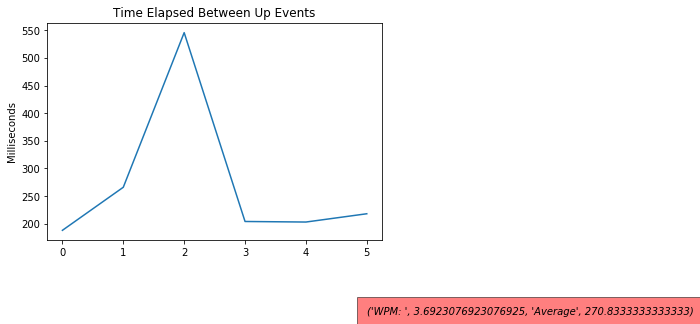

[172, 281, 547, 188, 219, 218]


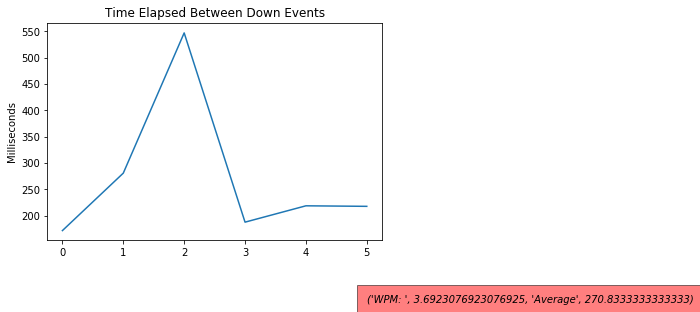

[78, 94, 79, 78, 94, 78]


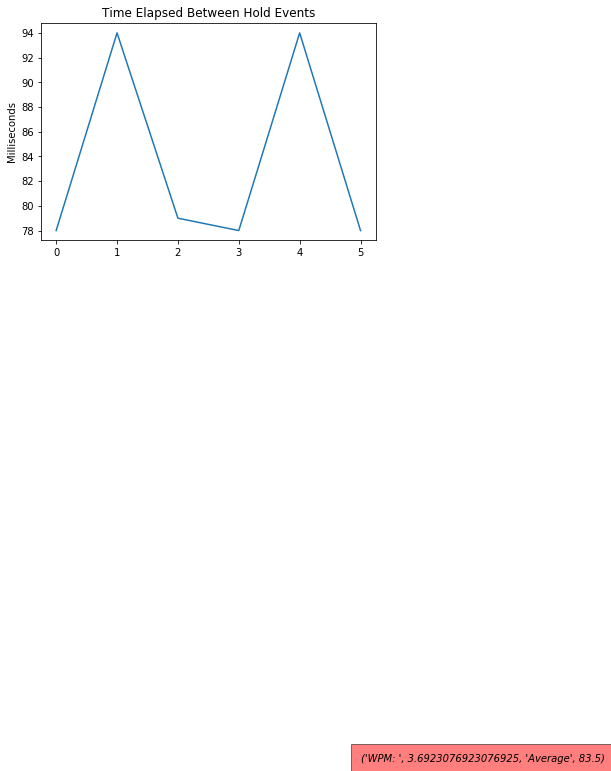

[94, 187, 468, 110, 125, 140]


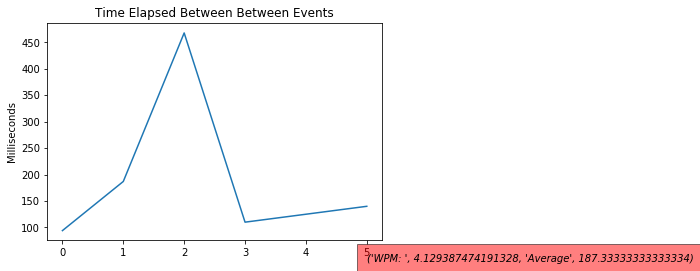

In [113]:
sn = 10
username = 'tamara'
print(userdf[(userdf.sn == sn) & (userdf.username == username)])
timeBetweenUPS(userdf[(userdf.sn == sn) & (userdf.username == username)])
timeBetweenDOWNS(userdf[(userdf.sn == sn) & (userdf.username == username)])
timeHoldingKey(userdf[(userdf.sn == sn) & (userdf.username == username)])
timeBetweenKey(userdf[(userdf.sn == sn) & (userdf.username == username)])

In [93]:
userdf.head()

,username,sn,phrase,date,key,action,time
0,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,D,Down,694791687
1,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,S,Down,694791765
2,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,D,Up,694791812
3,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,S,Up,694791859
4,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,L,Down,694791953


In [109]:
def getUserSnDict(userdf):
    uniqUsers = set(userdf.username)
    userSnDict = {}
    for user in uniqUsers:
        sessions = set()
        if not user in userSnDict:
            userSnDict[user] = list()
        for sn in userdf[userdf.username == user].sn:
            if sn not in sessions:
                userSnDict[user].append(sn)
            sessions.add(sn)
    return userSnDict

In [118]:
usnd = getUserSnDict(userdf[userdf.phrase == 'dslhbyj'])

In [121]:
usnd['george'][0]

0.0

In [155]:
for user in usnd:
    print (user)
    for sn in usnd[user]:
        print (sn)
        df = userdf[(userdf.sn == sn) & (userdf.username == user)]
        print (gettimeBetweenDOWNS(df))
        print (gettimeBetweenUPS(df))
        print (gettimeBetweenKey(df))
        print (gettimeHoldingKey(df))

tamara
1.0
[157, 390, 297, 172, 219, 203]
[157, 390, 313, 156, 219, 203]
[79, 312, 219, 78, 141, 125]
[78, 78, 78, 94, 78, 78]
2.0
[187, 297, 391, 171, 235, 219]
[203, 297, 375, 187, 219, 219]
[109, 203, 297, 93, 141, 141]
[78, 94, 94, 78, 94, 78]
3.0
[219, 328, 406, 188, 219, 234]
[203, 328, 391, 187, 219, 250]
[109, 234, 312, 109, 141, 156]
[110, 94, 94, 79, 78, 78]
4.0
[203, 281, 438, 187, 172, 188]
[218, 266, 422, 172, 187, 203]
[109, 172, 344, 109, 109, 110]
[94, 109, 94, 78, 63, 78]
5.0
[219, 328, 328, 188, 218, 204]
[219, 328, 328, 187, 204, 218]
[125, 234, 234, 94, 125, 125]
[94, 94, 94, 94, 93, 79]
6.0
[203, 406, 328, 157, 187, 203]
[203, 390, 313, 172, 203, 187]
[109, 312, 250, 94, 109, 109]
[94, 94, 78, 63, 78, 94]
7.0
[188, 281, 625, 235, 203, 187]
[188, 281, 609, 235, 218, 188]
[94, 187, 531, 157, 125, 94]
[94, 94, 94, 78, 78, 93]
8.0
[172, 312, 344, 156, 188, 203]
[172, 296, 329, 171, 204, 203]
[78, 218, 266, 93, 110, 109]
[94, 94, 78, 63, 78, 94]
9.0
[188, 297, 328, 187,